# **DEFAULT LOAN PREDICTION BASSED ON CUSTOMER BEHAVIOR**

---

By : Ni Made Yuli Cahyani

**Goals of The Project:**
*   Learn how to predict who possible defaulters are for the Consumer Loans Product
*   Learn how to explore data, preprocessing data and implement some various machine laerning methods and analyze their performances



![loan-cover](https://user-images.githubusercontent.com/71582007/176078145-dc188004-478e-4e62-b1e4-67e5a8752d49.jpg)

**About Dataset:**

Dataset that used in this project is from Kaggle belongs to Hackathon organized by Univ.AI. This dataset contain data about historic customer behavior based on what have observed. Hence when an organization acquire new customers they want to predict who is riskier and who is not.

 | About                   | Description                                                                               |
  | ----------------------- | --------------------------------------------------------------------------------------- |
  | Source                  | Loan Prediction Based on Customer Behavior : [Kaggle](https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior) |
  | Dataset Owner           | Subham Surana                                                                           |
  | Lisensi                 | Other (specified in description)                                                     |
  | Category                | Finance, Banking           |
  | Usability       | 10.00(Gold)                                                                            |
  | File type and size | CSV (22.52 MiB)   



The following are the variables provided in the dataset:
* **Income** - Income of the user - int
* **Age** - Age of the user - int
* **Experience** -	Professional experience of the user in years -	int
* **Married/Single** -	Whether married or single -	string
* **House_Ownership** -	Owned or rented or neither -	string
* **Car_Ownership** -	Does the person own a car -	string
* **Profession** -	Profession -	string
* **CITY** -	City of residence -	string
* **STATE** -	State of residence -	string
* **CURRENT_JOB_YRS**	- Years of experience in the current job -	int
* **CURRENT_HOUSE_YRS** -	Number of years in the current residence -	int
* **Risk_Flag** -	Defaulted on a loan. The Risk_Flag indicates whether there has been a default in the past or not. 'Non Defaulter' encoded as 0, and 'Defaulter' encoded as 1 -	string





# **Import Libraries**

In [1]:
!pip install opendatasets --quiet

In [2]:
import warnings
warnings.filterwarnings('ignore')
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn. model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,classification_report,plot_confusion_matrix,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from tensorflow import keras
import tensorboard as tf
from sklearn.metrics import confusion_matrix

# **Download & Loading Data**

In [3]:
download_url = 'https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yulicahyani
Your Kaggle Key: ··········


100%|██████████| 5.15M/5.15M [00:00<00:00, 43.2MB/s]

In [4]:
df = pd.read_csv("/content/loan-prediction-based-on-customer-behavior/Training Data.csv")

# **Exploratory Data Analysis and Visualization**

## Dataset Summary

In [ ]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
df.shape

(252000, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [ ]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [ ]:
df.duplicated().sum()

0

According to the basic observation on the dataset:

*   The dataset has 13 columns (variables) and has 252,000 observations
*   There are some columns that contain numerical values and some columns contain categorical values
*   There no missing values
*   There seems to be no duplicate data
*   Based on the dataset, in this project we are going to make classification model to classify potential loan defaulters on the target variable Risk_Flag

## Distribution of Non-Defaulter and Defaulter Customer

In [5]:
risk_flag = df['Risk_Flag'].value_counts()
risk_flag

0    221004
1     30996
Name: Risk_Flag, dtype: int64

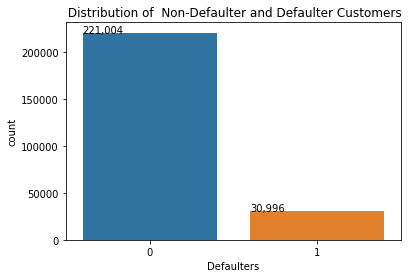

In [6]:
ax = sns.countplot(x=df['Risk_Flag'])
ax.set_title(" Distribution of  Non-Defaulter and Defaulter Customers")
plt.xlabel('Defaulters')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

* Number of non-defaulter customers - 221,004

* Number of defaulter customers - 30,996

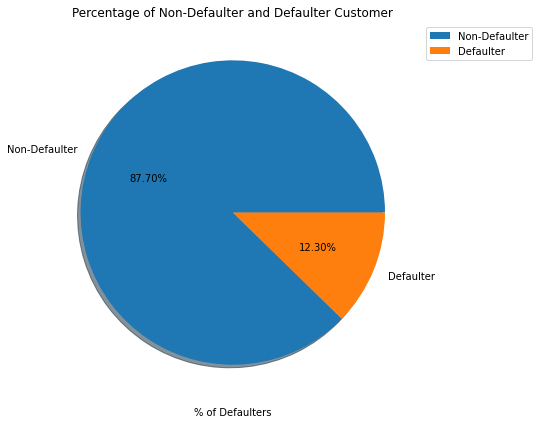

In [ ]:
risk_flag.plot(kind="pie",figsize=(7,7),autopct="%1.2f%%",
         shadow=True,labels=['Non-Defaulter','Defaulter'], title="Percentage of Non-Defaulter and Defaulter Customer")
plt.xlabel('% of Defaulters')
plt.ylabel('')
plt.legend(loc='best',bbox_to_anchor=(0.3,0,1,1))
plt.show()

* The data seem unbalance beetween non-defaulter and defaulter custumer. 

* The percentage of non-defaulter customers is 87.70% and defaulter customers is 12.30%

## Distribution of Marital Status - 'Married/Single'

In [ ]:
status = df['Married/Single'].value_counts()
status

single     226272
married     25728
Name: Married/Single, dtype: int64

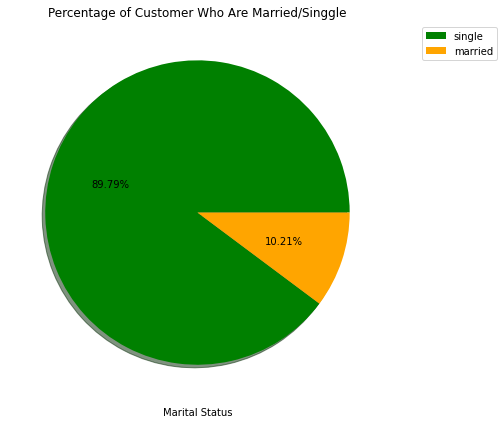

In [ ]:
status.plot(kind="pie",figsize=(7,7),autopct="%1.2f%%", colors=['green','orange'],
         shadow=True,labels=None, title="Percentage of Customer Who Are Married/Singgle")
plt.xlabel('Marital Status')
plt.ylabel('')
plt.legend(labels=status.index, loc='best',bbox_to_anchor=(0.3,0,1,1))
plt.show()

* Number of customers who are single - 226,272
* Number of customers who are married - 25,728

* The percentage of customers who are single is 87.79% and customers who are married is 10.21%
* Most customer who take loans are single

## Distribution of Non-Defaulter and Defaulter Customer by Marital Status

In [ ]:
defaulter = df[df["Risk_Flag"] == 1]
non_defaulter = df[df["Risk_Flag"] == 0]

In [ ]:
print("Defaulter customers by marital status: \n", defaulter['Married/Single'].value_counts())
print("\n Non-defaulter customers by marital status: \n", non_defaulter['Married/Single'].value_counts())

Defaulter customers by marital status: 
 single     28360
married     2636
Name: Married/Single, dtype: int64

 Non-defaulter customers by marital status: 
 single     197912
married     23092
Name: Married/Single, dtype: int64


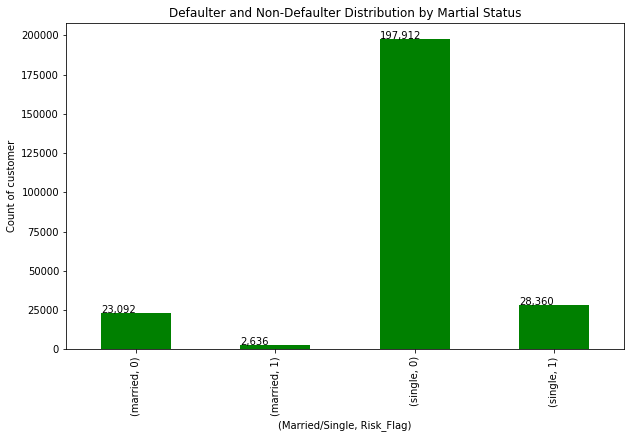

In [ ]:
ax = df.groupby(['Married/Single', 'Risk_Flag']).size().plot(kind='bar',figsize=(10, 6), color='green')
ax.set_title("Defaulter and Non-Defaulter Distribution by Martial Status")
ax.set_xlabel("(Married/Single, Risk_Flag)")
ax.set_ylabel("Count of customer")
plt.ticklabel_format(style='plain', axis='y')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

* Number of defaulter customers who are single - 28,360
* Number of defaulters customers who are married - 2,636


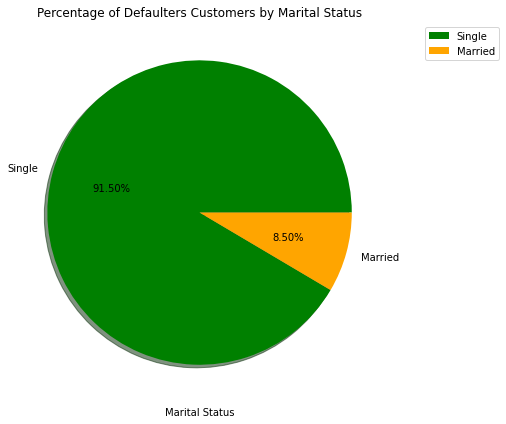

In [ ]:
defaulter['Married/Single'].value_counts().plot(kind="pie",figsize=(7,7),autopct="%1.2f%%", colors=['green','orange'],
         shadow=True,labels=['Single', 'Married'], title="Percentage of Defaulters Customers by Marital Status")
plt.xlabel('Marital Status')
plt.ylabel('')
plt.legend(loc='best',bbox_to_anchor=(0.3,0,1,1))
plt.show()

* The percentage of defaulter customers who are single is 91.50% and defaulter customers who are married is 8.50%

* Most defaulter customer are single

## Distribution of House Ownership

In [ ]:
house_ownership = df['House_Ownership'].value_counts()
house_ownership

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

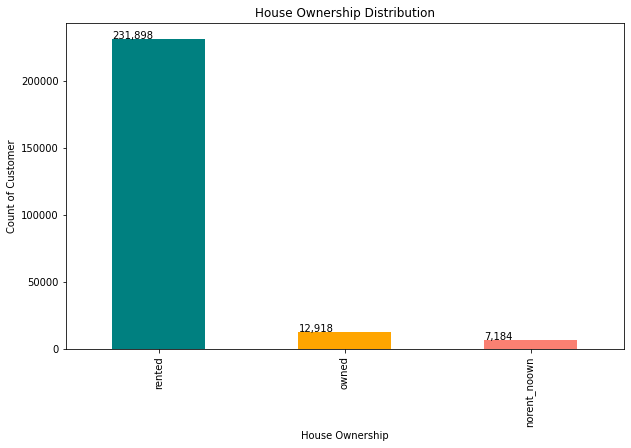

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))
house_ownership.plot(kind='bar', title="House Ownership Distribution", ax=ax, figsize=(10,6), color=['teal','orange', 'salmon'])
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("Count of Customer")
plt.xlabel("House Ownership")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))
plt.show()

* Number of customers who rent a house - 231,898

* Number of customers who own a house - 12,918

* Number of customers who not rent or own a house - 7,184

## Distribution of Non-Defaulter and Defaulter Customer by House Ownership

In [ ]:
print("Defaulter customers by House Ownership: \n", defaulter['House_Ownership'].value_counts())
print("\n Non-defaulter customers by House Ownership: \n", non_defaulter['House_Ownership'].value_counts())

Defaulter customers by House Ownership: 
 rented          29121
owned            1160
norent_noown      715
Name: House_Ownership, dtype: int64

 Non-defaulter customers by House Ownership: 
 rented          202777
owned            11758
norent_noown      6469
Name: House_Ownership, dtype: int64


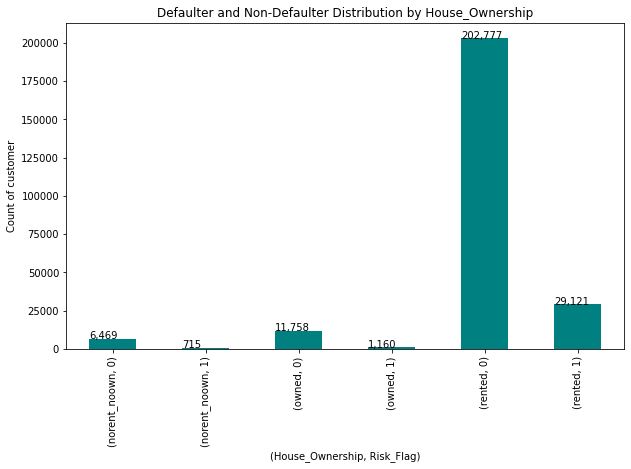

In [ ]:
ax = df.groupby(['House_Ownership', 'Risk_Flag']).size().plot(kind='bar',figsize=(10, 6), color='teal')
ax.set_title("Defaulter and Non-Defaulter Distribution by House_Ownership")
ax.set_xlabel("(House_Ownership, Risk_Flag)")
ax.set_ylabel("Count of customer")
plt.ticklabel_format(style='plain', axis='y')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

* Number of defaulter customers who rent a house - 29,121

* Number of defaulter customers who own a house - 1,160

* Number of defaulter customers who not rent or own a house - 715

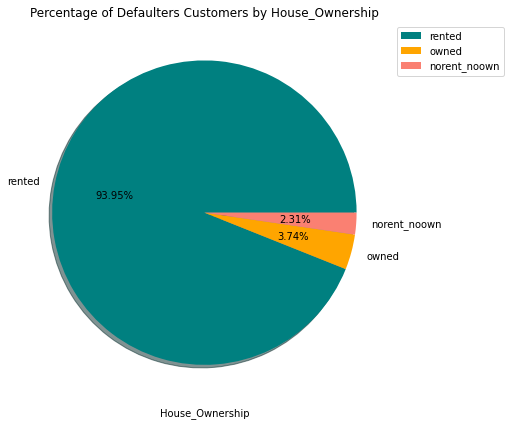

In [ ]:
defaulter['House_Ownership'].value_counts().plot(kind="pie",figsize=(7,7),autopct="%1.2f%%", colors=['teal','orange', 'salmon'],
         shadow=True,labels=defaulter['House_Ownership'].value_counts().index)
plt.xlabel('House_Ownership')
plt.ylabel('')
plt.title("Percentage of Defaulters Customers by House_Ownership")
plt.legend(loc='best',bbox_to_anchor=(0.3,0,1,1))
plt.show()

* The percentage of defaulter customers who rent a house is 93.95% and defaulter customers who own a house is 3.74% and defaulter customers who not rent or own a house is 2.31%

* Most defaulter customer are rented a house

## Distribution of Car Ownership

In [ ]:
car_ownership = df['Car_Ownership'].value_counts()
car_ownership

no     176000
yes     76000
Name: Car_Ownership, dtype: int64

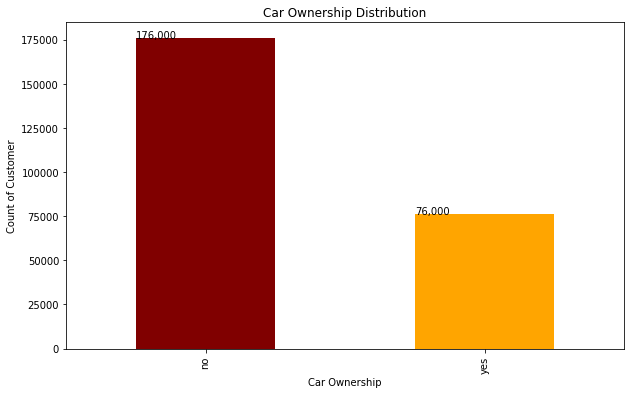

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))
car_ownership.plot(kind='bar', title="Car Ownership Distribution", ax=ax, figsize=(10,6), color=['maroon', 'orange'])
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("Count of Customer")
plt.xlabel("Car Ownership")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))
plt.show()

* Number of customers who own a car - 76,000

* Number of customers who dont own a car - 176,000

## Distribution of Non-Defaulter and Defaulter Customer by Car Ownership

In [ ]:
print("Defaulter customers by Car Ownership: \n", defaulter['Car_Ownership'].value_counts())
print("\n Non-defaulter customers by Car Ownership: \n", non_defaulter['Car_Ownership'].value_counts())

Defaulter customers by Car Ownership: 
 no     22561
yes     8435
Name: Car_Ownership, dtype: int64

 Non-defaulter customers by Car Ownership: 
 no     153439
yes     67565
Name: Car_Ownership, dtype: int64


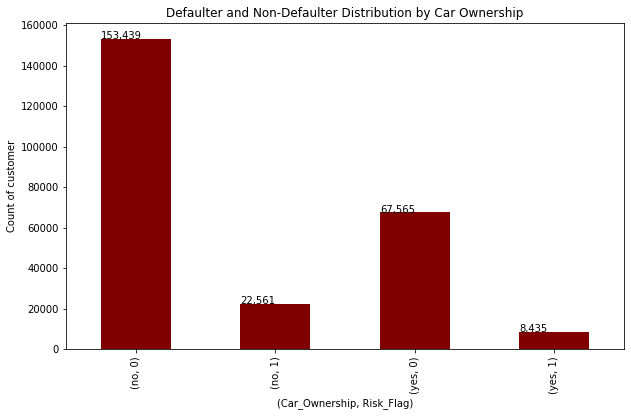

In [ ]:
ax = df.groupby(['Car_Ownership', 'Risk_Flag']).size().plot(kind='bar',figsize=(10, 6), color='maroon')
ax.set_title("Defaulter and Non-Defaulter Distribution by Car Ownership")
ax.set_xlabel("(Car_Ownership, Risk_Flag)")
ax.set_ylabel("Count of customer")
plt.ticklabel_format(style='plain', axis='y')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

* Number of defaulter customers who own a car - 8,435

* Number of defaulter customers who dont own a car - 22,561

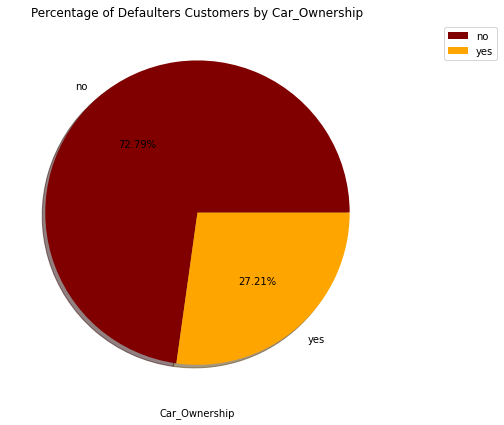

In [ ]:
defaulter['Car_Ownership'].value_counts().plot(kind="pie",figsize=(7,7),autopct="%1.2f%%", colors=['maroon','orange'],
         shadow=True,labels=defaulter['Car_Ownership'].value_counts().index)
plt.xlabel('Car_Ownership')
plt.ylabel('')
plt.title("Percentage of Defaulters Customers by Car_Ownership")
plt.legend(loc='best',bbox_to_anchor=(0.3,0,1,1))
plt.show()

* The percentage of defaulter customers  who own a car is 27.21% and defaulter customers who dont own a car is 72.79%

* Most defaulter customers are dont own a car

## Distribution of Professions Who Take Loan

In [ ]:
top_profession_loan = df['Profession'].value_counts().head(10)
top_profession_loan

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Name: Profession, dtype: int64

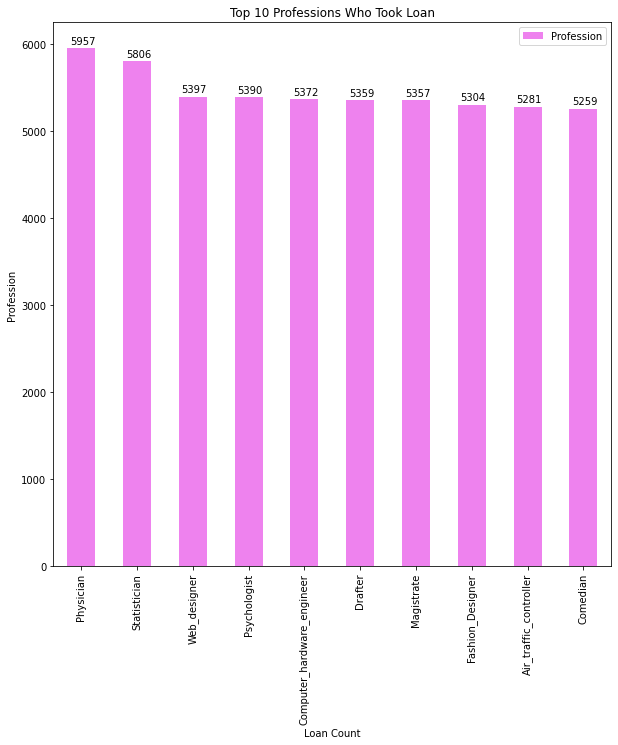

In [ ]:
top_profession_loan.plot(kind='bar',x='Profession',figsize=(10,10), color='violet')
plt.legend(loc='best')
plt.title('Top 10 Professions Who Took Loan')
plt.xlabel('Loan Count')
plt.ylabel('Profession')
for index,value in enumerate(top_profession_loan):
    plt.text(index-0.2,value+50,str(value))
plt.show() 

* Top 10 professions who took loan the most are Physician, Statistician, Web_designer, Psychologist, Computer_hardware_engineer , Drafter, Magistrate, Fashion_Designer, Air_traffic_controller, Comedian

* Most of customers who took loan have profession as Physician, totaling 5957 customers

## Distribution of Professions by Income

In [ ]:
top_profession_by_income = df.groupby(['Profession']).mean()[['Income']].sort_values('Income', ascending=False)[:15]
top_profession_by_income

,Income
Profession,
Petroleum_Engineer,5.443310e+06
Psychologist,5.357795e+06
Designer,5.336802e+06
Scientist,5.282710e+06
Surgeon,5.235359e+06
Comedian,5.199539e+06
Chemical_engineer,5.189805e+06
Mechanical_engineer,5.175032e+06
Artist,5.164765e+06


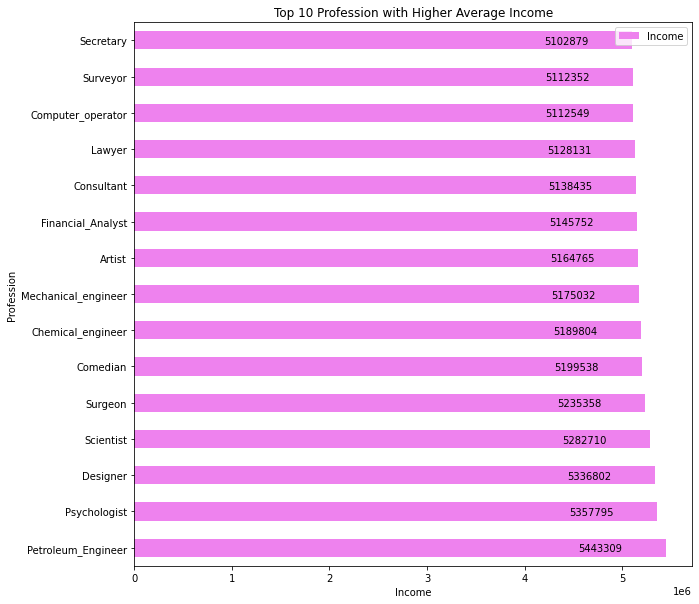

In [ ]:
top_profession_by_income.plot(kind='barh',figsize=(10,10), color='violet')
plt.title('Top 10 Profession with Higher Average Income')
plt.xlabel('Income')
plt.ylabel('Profession')

for index,value in enumerate(top_profession_by_income['Income']):
    plt.text(value-900000,index-0.1,str(int(value)))
plt.legend(loc='best')
plt.show()

* Top 10 professions with higher average income are 'Petroleum_Engineer', 'Psychologist', 'Designer', 'Scientist', 'Surgeon', 'Comedian', 'Chemical_engineer', 'Mechanical_engineer', 'Artist', 'Financial_Analyst', 'Consultant', 'Lawyer', 'Computer_operator' 'Surveyor', 'Secretary'

## Distribution of Non-Defaulter and Defaulter Customer by Profession and Income

In [ ]:
print("Defaulter customers by Profession: \n", defaulter['Profession'].value_counts())
print("\n Non-defaulter customers by Profession: \n", non_defaulter['Profession'].value_counts())

Defaulter customers by Profession: 
 Police_officer                826
Software_Developer            750
Air_traffic_controller        715
Surveyor                      714
Physician                     710
Army_officer                  709
Hotel_Manager                 701
Technical_writer              697
Chartered_Accountant          690
Scientist                     690
Computer_hardware_engineer    690
Geologist                     674
Statistician                  671
Secretary                     660
Psychologist                  657
Biomedical_Engineer           654
Magistrate                    643
Aviator                       642
Flight_attendant              634
Comedian                      629
Civil_engineer                627
Lawyer                        624
Technician                    624
Computer_operator             619
Fashion_Designer              612
Firefighter                   612
Architect                     611
Microbiologist                607
Drafter    

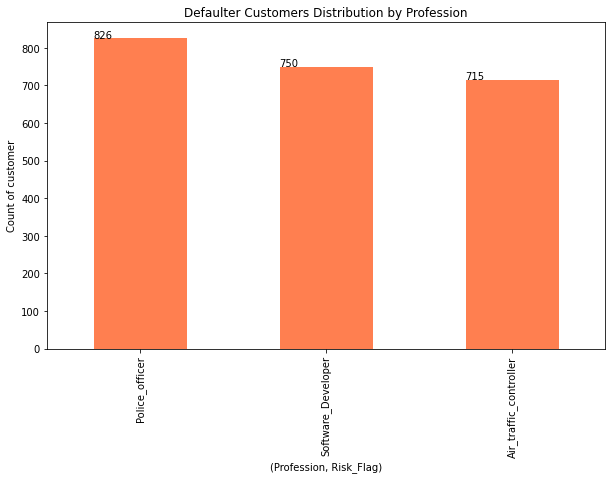

In [ ]:
ax = defaulter.groupby(['Profession']).size().sort_values(ascending=False).head(3).plot(kind='bar',figsize=(10, 6), color='coral')
ax.set_title("Defaulter Customers Distribution by Profession")
ax.set_xlabel("(Profession, Risk_Flag)")
ax.set_ylabel("Count of customer")
plt.ticklabel_format(style='plain', axis='y')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

* Top 3 profession that have most defaulter customers are police officer, software developer and trafic controller

* Number of defaulter customers who are police officer - 826

* Number of defaulter customers who are software developer - 750

* Number of defaulter customers who are air trafic controller - 715

* Most defaulter customers are police officer

In [ ]:
non_deafulter_by_profession_income = non_defaulter.groupby(['Profession']).mean()[['Income']].sort_values(by='Income',ascending=False)
non_deafulter_by_profession_income

,Income
Profession,
Petroleum_Engineer,5.464167e+06
Psychologist,5.371496e+06
Designer,5.335546e+06
Consultant,5.309301e+06
Surgeon,5.258215e+06
Mechanical_engineer,5.236917e+06
Financial_Analyst,5.235485e+06
Comedian,5.216651e+06
Artist,5.212292e+06


In [ ]:
defaulter_by_profession_income = defaulter.groupby(['Profession']).mean()[['Income']].sort_values(by='Income',ascending=False)
defaulter_by_profession_income

,Income
Profession,
Chemical_engineer,6.183468e+06
Scientist,6.165221e+06
Army_officer,6.143384e+06
Secretary,5.848192e+06
Computer_hardware_engineer,5.684864e+06
Surveyor,5.518711e+06
Civil_engineer,5.507777e+06
Biomedical_Engineer,5.505449e+06
Technician,5.450803e+06


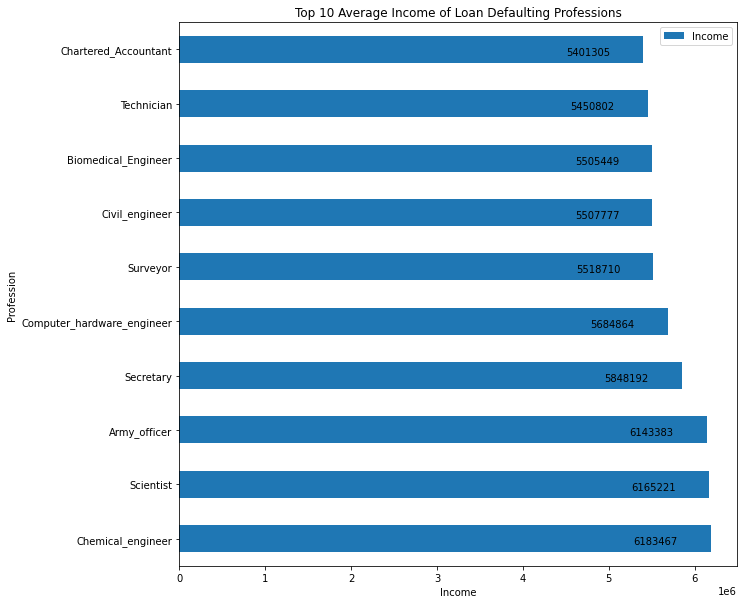

In [ ]:
defaulter_by_profession_income.head(10).plot(kind='barh',figsize=(10,10))
plt.title('Top 10 Average Income of Loan Defaulting Professions') 
plt.xlabel('Income')
plt.ylabel('Profession')
for index,value in enumerate(defaulter_by_profession_income['Income'].head(10)):
    plt.text(value-900000,index-0.1,str(int(value)))

plt.legend(loc='best')
plt.show()

In [ ]:
defaulter_by_profession_income.index

Index(['Chemical_engineer', 'Scientist', 'Army_officer', 'Secretary',
       'Computer_hardware_engineer', 'Surveyor', 'Civil_engineer',
       'Biomedical_Engineer', 'Technician', 'Chartered_Accountant',
       'Web_designer', 'Designer', 'Technical_writer', 'Architect', 'Chef',
       'Psychologist', 'Petroleum_Engineer', 'Lawyer', 'Comedian', 'Surgeon',
       'Aviator', 'Fashion_Designer', 'Analyst', 'Firefighter',
       'Technology_specialist', 'Dentist', 'Artist', 'Librarian',
       'Industrial_Engineer', 'Microbiologist', 'Economist',
       'Computer_operator', 'Mechanical_engineer', 'Flight_attendant',
       'Physician', 'Air_traffic_controller', 'Geologist', 'Engineer',
       'Design_Engineer', 'Statistician', 'Civil_servant', 'Official',
       'Magistrate', 'Hotel_Manager', 'Politician', 'Police_officer',
       'Financial_Analyst', 'Graphic_Designer', 'Software_Developer',
       'Consultant', 'Drafter'],
      dtype='object', name='Profession')

* Top 10 highest Average Income of Loan Defaulting Professions are 'Chemical_engineer', 'Scientist', 'Army_officer', 'Secretary', 'Computer_hardware_engineer', 'Surveyor', 'Civil_engineer', 'Biomedical_Engineer', 'Technician', 'Chartered_Accountant'

## Distribution of Non-Defaulter and Defaulter Customer by Sate

In [ ]:
top_state_loan = df['STATE'].value_counts().head(10)
top_state_loan

Uttar_Pradesh     28400
Maharashtra       25562
Andhra_Pradesh    25297
West_Bengal       23483
Bihar             19780
Tamil_Nadu        16537
Madhya_Pradesh    14122
Karnataka         11855
Gujarat           11408
Rajasthan          9174
Name: STATE, dtype: int64

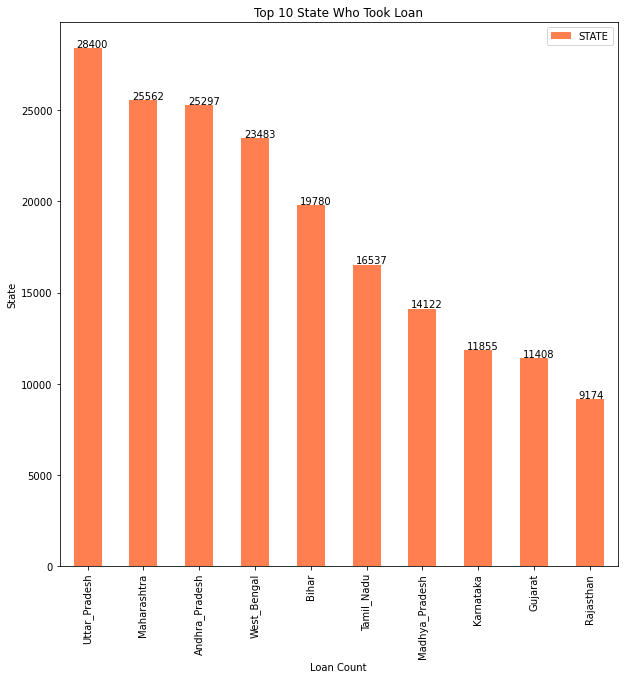

In [ ]:
top_state_loan.plot(kind='bar',x='STATE',figsize=(10,10), color='coral')
plt.legend(loc='best')
plt.title('Top 10 State Who Took Loan')
plt.xlabel('Loan Count')
plt.ylabel('State')
for index,value in enumerate(top_state_loan):
    plt.text(index-0.2,value+50,str(value))
plt.show() 

* Top 10 State who took loan 'Uttar_Pradesh', 'Maharashtra', 'Andhra_Pradesh', 'West_Bengal', 'Bihar', 'Tamil_Nadu', 'Madhya_Pradesh', 'Karnataka', 'Gujarat', 'Rajasthan'

## Distribution of Non-Defaulter and Defaulter Customer by City

# **Data Preprocessing**

## Droping Unused Column

In [7]:
df.drop(['Id'],axis=1,inplace=True)

## Handling Categorical Variables

In [8]:
cols_to_encode= ['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']
labelencoder = LabelEncoder()

for col in cols_to_encode:
    df[col] = labelencoder.fit_transform(df[col])

In [9]:
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,251,13,3,13,0
1,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5768871,47,11,1,2,0,11,296,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,2,0,45,162,28,6,11,0
251996,2843572,26,10,1,2,0,3,251,13,6,11,0
251997,4522448,46,7,1,2,0,17,144,14,7,12,0
251998,6507128,45,0,1,2,0,27,233,18,0,10,0


## Handling Unbalanced Data

In [10]:
sampler = RandomOverSampler(random_state=42,sampling_strategy=0.5)
X = df.iloc[:,:-1]
y = df['Risk_Flag']

In [11]:
X_sampled,y_sampled = sampler.fit_resample(X,y)

In [12]:
print(Counter(y),Counter(y_sampled))

Counter({0: 221004, 1: 30996}) Counter({0: 221004, 1: 110502})


In [13]:
data = pd.concat([X_sampled,y_sampled],axis=1)

In [14]:
data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,251,13,3,13,0
1,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5768871,47,11,1,2,0,11,296,22,3,14,1


## Splitting and  Standardizing Data

In [15]:
X = data.drop('Risk_Flag',1)
y = data['Risk_Flag']

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
print('Train')
print(y_train.value_counts())
print('\nTest')
print(y_test.value_counts())

Train
0    154582
1     77472
Name: Risk_Flag, dtype: int64

Test
0    66422
1    33030
Name: Risk_Flag, dtype: int64


In [18]:
# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# **Model Selection**

## Decision Tree

Accuracy: 0.9159091823191087
Precision: 0.8065975588535064
Recall: 0.9823493793521042
F1 Score: 0.885840260998949
Roc_Auc score: 0.9326097563708218

              precision    recall  f1-score   support

           0       0.99      0.88      0.93     66422
           1       0.81      0.98      0.89     33030

    accuracy                           0.92     99452
   macro avg       0.90      0.93      0.91     99452
weighted avg       0.93      0.92      0.92     99452



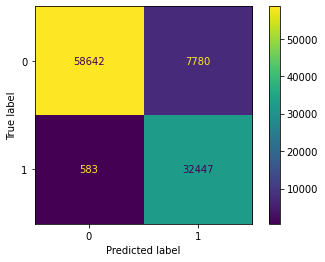

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred = dt.predict(X_test)

dt_accuracy = accuracy_score(y_test,pred)
dt_precision = precision_score(y_test,pred)
dt_recall = recall_score(y_test,pred)
dt_f1_Score = f1_score(y_test,pred)
dt_roc_auc_score = roc_auc_score(y_test,pred)

print(f'Accuracy: {accuracy_score(y_test,pred)}')
print(f'Precision: {precision_score(y_test,pred)}')
print(f'Recall: {recall_score(y_test,pred)}')
print(f'F1 Score: {f1_score(y_test,pred)}')
print(f'Roc_Auc score: {roc_auc_score(y_test,pred)}\n')

print(classification_report(y_test,pred))
plot_confusion_matrix(estimator=dt,X=X_test,y_true=y_test)

## Random Forest

Accuracy: 0.9362305433777098
Precision: 0.8518616179727877
Recall: 0.9780805328489253
F1 Score: 0.9106181469684586
Roc_Auc score: 0.9467500613719199

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     66422
           1       0.85      0.98      0.91     33030

    accuracy                           0.94     99452
   macro avg       0.92      0.95      0.93     99452
weighted avg       0.94      0.94      0.94     99452



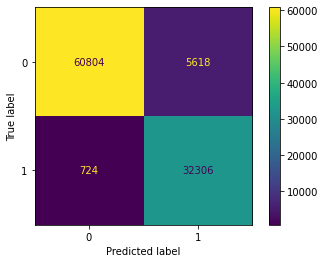

In [19]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test,pred)
rf_precision = precision_score(y_test,pred)
rf_recall = recall_score(y_test,pred)
rf_f1_Score = f1_score(y_test,pred)
rf_roc_auc_score = roc_auc_score(y_test,pred)

print(f'Accuracy: {accuracy_score(y_test,pred)}')
print(f'Precision: {precision_score(y_test,pred)}')
print(f'Recall: {recall_score(y_test,pred)}')
print(f'F1 Score: {f1_score(y_test,pred)}')
print(f'Roc_Auc score: {roc_auc_score(y_test,pred)}\n')

print(classification_report(y_test,pred))
plot_confusion_matrix(estimator=rf,X=X_test,y_true=y_test)

## XGBoost

Accuracy: 0.7684410569923179
Precision: 0.8156283532159313
Recall: 0.3912201029367242
F1 Score: 0.5287991324453175
Roc_Auc score: 0.6736218547865398

              precision    recall  f1-score   support

           0       0.76      0.96      0.85     66422
           1       0.82      0.39      0.53     33030

    accuracy                           0.77     99452
   macro avg       0.79      0.67      0.69     99452
weighted avg       0.78      0.77      0.74     99452



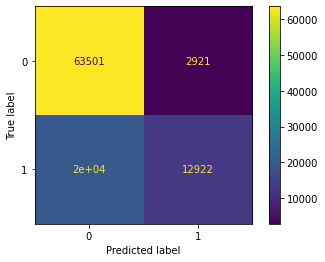

In [ ]:
xgb = XGBClassifier(learning_rate=0.1, 
                    n_estimators=1000, 
                    use_label_encoder=False,
                    max_dept=3,
                    n_jobs=-1)
xgb.fit(X_train,y_train)
pred = xgb.predict(X_test)

xgb_accuracy = accuracy_score(y_test,pred)
xgb_precision = precision_score(y_test,pred)
xgb_recall = recall_score(y_test,pred)
xgb_f1_Score = f1_score(y_test,pred)
xgb_roc_auc_score = roc_auc_score(y_test,pred)

print(f'Accuracy: {accuracy_score(y_test,pred)}')
print(f'Precision: {precision_score(y_test,pred)}')
print(f'Recall: {recall_score(y_test,pred)}')
print(f'F1 Score: {f1_score(y_test,pred)}')
print(f'Roc_Auc score: {roc_auc_score(y_test,pred)}\n')

print(classification_report(y_test,pred))
plot_confusion_matrix(estimator=xgb,X=X_test,y_true=y_test)

## Logistic Regression

Accuracy: 0.6678799823030206
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Roc_Auc score: 0.5

              precision    recall  f1-score   support

           0       0.67      1.00      0.80     66422
           1       0.00      0.00      0.00     33030

    accuracy                           0.67     99452
   macro avg       0.33      0.50      0.40     99452
weighted avg       0.45      0.67      0.53     99452



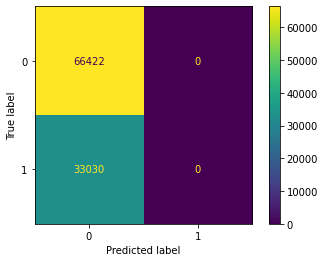

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

lr_accuracy = accuracy_score(y_test,pred)
lr_precision = precision_score(y_test,pred)
lr_recall = recall_score(y_test,pred)
lr_f1_Score = f1_score(y_test,pred)
lr_roc_auc_score = roc_auc_score(y_test,pred)

print(f'Accuracy: {accuracy_score(y_test,pred)}')
print(f'Precision: {precision_score(y_test,pred)}')
print(f'Recall: {recall_score(y_test,pred)}')
print(f'F1 Score: {f1_score(y_test,pred)}')
print(f'Roc_Auc score: {roc_auc_score(y_test,pred)}\n')

print(classification_report(y_test,pred))
plot_confusion_matrix(estimator=lr,X=X_test,y_true=y_test)

## Naive Bayes

Accuracy: 0.665597474158388
Precision: 0.41302681992337165
Recall: 0.01631849833484711
F1 Score: 0.031396534148827725
Roc_Auc score: 0.5023930873535668

              precision    recall  f1-score   support

           0       0.67      0.99      0.80     66422
           1       0.41      0.02      0.03     33030

    accuracy                           0.67     99452
   macro avg       0.54      0.50      0.41     99452
weighted avg       0.58      0.67      0.54     99452



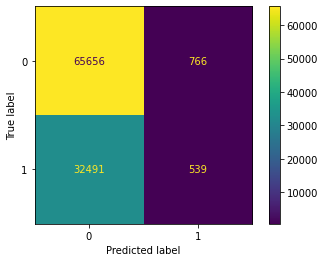

In [ ]:
nb = GaussianNB()
nb.fit(X_train,y_train)
pred = nb.predict(X_test)

nb_accuracy = accuracy_score(y_test,pred)
nb_precision = precision_score(y_test,pred)
nb_recall = recall_score(y_test,pred)
nb_f1_Score = f1_score(y_test,pred)
nb_roc_auc_score = roc_auc_score(y_test,pred)

print(f'Accuracy: {accuracy_score(y_test,pred)}')
print(f'Precision: {precision_score(y_test,pred)}')
print(f'Recall: {recall_score(y_test,pred)}')
print(f'F1 Score: {f1_score(y_test,pred)}')
print(f'Roc_Auc score: {roc_auc_score(y_test,pred)}\n')

print(classification_report(y_test,pred))
plot_confusion_matrix(estimator=nb,X=X_test,y_true=y_test)

## K-Nearest Meighbor (KNN)

In [ ]:
error_rate = []
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, knn_predictions)
    print(f"Accuracy at k = {i} is {accuracy}")
    error_rate.append(np.mean(knn_predictions != y_test))

Accuracy at k = 1 is 0.887221976430841
Accuracy at k = 2 is 0.8518079073321804
Accuracy at k = 3 is 0.8847082009411575
Accuracy at k = 4 is 0.8655230664038933
Accuracy at k = 5 is 0.8802035152636448
Accuracy at k = 6 is 0.8693741704540884
Accuracy at k = 7 is 0.8753469010175763
Accuracy at k = 8 is 0.8685898725013071
Accuracy at k = 9 is 0.8756183887704622


Accuracy: 0.887221976430841
Precision: 0.8142503169298144
Recall: 0.855616106569785
F1 Score: 0.8344208568307302
Roc_Auc score: 0.8792774459559956

              precision    recall  f1-score   support

           0       0.93      0.90      0.91     66422
           1       0.81      0.86      0.83     33030

    accuracy                           0.89     99452
   macro avg       0.87      0.88      0.87     99452
weighted avg       0.89      0.89      0.89     99452



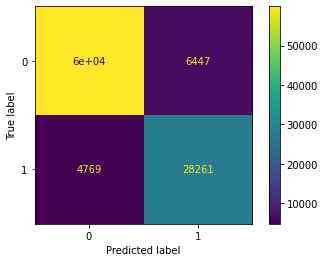

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test,pred)
knn_precision = precision_score(y_test,pred)
knn_recall = recall_score(y_test,pred)
knn_f1_Score = f1_score(y_test,pred)
knn_roc_auc_score = roc_auc_score(y_test,pred)

print(f'Accuracy: {accuracy_score(y_test,pred)}')
print(f'Precision: {precision_score(y_test,pred)}')
print(f'Recall: {recall_score(y_test,pred)}')
print(f'F1 Score: {f1_score(y_test,pred)}')
print(f'Roc_Auc score: {roc_auc_score(y_test,pred)}\n')

print(classification_report(y_test,pred))
plot_confusion_matrix(estimator=knn,X=X_test,y_true=y_test)

## Artificial Neural Network (ANN)

Accuracy: 0.696577243293247
Precision: 0.6003375052735199
Recall: 0.2584922797456857
F1 Score: 0.36138152882417673
Roc_Auc score: 0.586459111478636

              precision    recall  f1-score   support

           0       0.71      0.91      0.80     66422
           1       0.60      0.26      0.36     33030

    accuracy                           0.70     99452
   macro avg       0.66      0.59      0.58     99452
weighted avg       0.68      0.70      0.66     99452



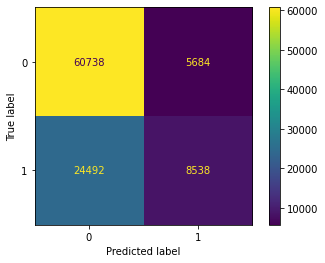

In [ ]:
ncols = len(X.columns)
hidden_layers = (ncols,ncols,ncols)
mlpc = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=1000, random_state=42)
mlpc.fit(X_train,y_train)
pred = mlpc.predict(X_test)

mlpc_accuracy = accuracy_score(y_test,pred)
mlpc_precision = precision_score(y_test,pred)
mlpc_recall = recall_score(y_test,pred)
mlpc_f1_Score = f1_score(y_test,pred)
mlpc_roc_auc_score = roc_auc_score(y_test,pred)

print(f'Accuracy: {accuracy_score(y_test,pred)}')
print(f'Precision: {precision_score(y_test,pred)}')
print(f'Recall: {recall_score(y_test,pred)}')
print(f'F1 Score: {f1_score(y_test,pred)}')
print(f'Roc_Auc score: {roc_auc_score(y_test,pred)}\n')

print(classification_report(y_test,pred))
plot_confusion_matrix(estimator=mlpc,X=X_test,y_true=y_test)

## Keras Tensorflow

In [ ]:
tf_model = keras.Sequential([
    keras.layers.Dense(256, input_shape=(11,), activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
tf_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = tf_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50,batch_size=64)


Epoch 1/50
3626/3626 [==============================] - 15s 4ms/step - loss: 0.6013 - accuracy: 0.6824 - val_loss: 0.5578 - val_accuracy: 0.7164
Epoch 2/50
3626/3626 [==============================] - 10s 3ms/step - loss: 0.5177 - accuracy: 0.7468 - val_loss: 0.4905 - val_accuracy: 0.7648
Epoch 3/50
3626/3626 [==============================] - 10s 3ms/step - loss: 0.4635 - accuracy: 0.7916 - val_loss: 0.4471 - val_accuracy: 0.8079
Epoch 4/50
3626/3626 [==============================] - 11s 3ms/step - loss: 0.4343 - accuracy: 0.8144 - val_loss: 0.4256 - val_accuracy: 0.8155
Epoch 5/50
3626/3626 [==============================] - 17s 5ms/step - loss: 0.4143 - accuracy: 0.8278 - val_loss: 0.4089 - val_accuracy: 0.8341
Epoch 6/50
3626/3626 [==============================] - 14s 4ms/step - loss: 0.4004 - accuracy: 0.8361 - val_loss: 0.4044 - val_accuracy: 0.8309
Epoch 7/50
3626/3626 [==============================] - 11s 3ms/step - loss: 0.3889 - accuracy: 0.8427 - val_loss: 0.3870 - val_ac

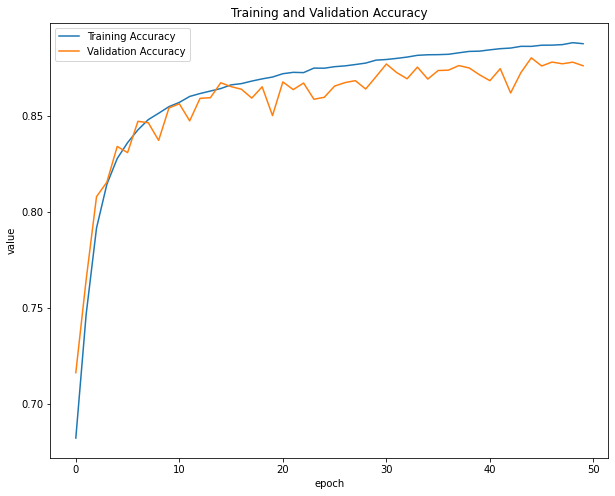

In [ ]:
#summarize history for accuracy
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

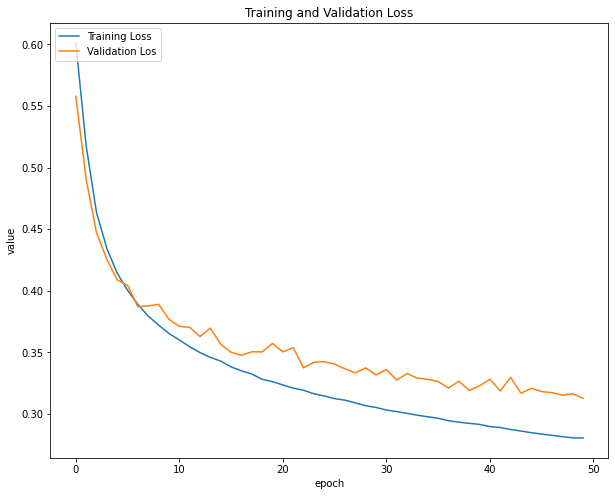

In [ ]:
#summarize history for loss
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Los'], loc='upper left')
plt.show()

In [ ]:
tf_accuracy = history.history['val_accuracy']
tf_accuracy = tf_accuracy[-1]

print(f'Accuracy: {tf_accuracy}')

Accuracy: 0.8760809302330017


## Comparing Performances

In [ ]:
print("\nAccuracy of Decision Tree: \n", round(dt_accuracy, 2))
print("\nAccuracy of Random Forest: \n", round(rf_accuracy,2))
print("\nAccuracy of XGBoost: \n", round(xgb_accuracy,2))
print("\nAccuracy of Logistic Regression: \n",round(lr_accuracy,2))
print("\nAccuracy of Naive Bayes: \n", round(nb_accuracy,2))
print("\nAccuracy of KNN: \n", round(knn_accuracy,2))
print("\nAccuracy of MLPC: \n", round(mlpc_accuracy,2))
print("\nAccuracy of Tensorflow: \n", round(tf_accuracy,2))


Accuracy of Decision Tree: 
 0.92

Accuracy of Random Forest: 
 0.94

Accuracy of XGBoost: 
 0.77

Accuracy of Logistic Regression: 
 0.67

Accuracy of Naive Bayes: 
 0.67

Accuracy of KNN: 
 0.89

Accuracy of MLPC: 
 0.7

Accuracy of Tensorflow: 
 0.88


* From the above results Random Forest has the Accuracy closest to 1, so from that result we can say that Random forest is the right model in this scenario.

## The most important feature in classifying transactions.

Let's take a look at what features ended up being the most important in classifying transactions.

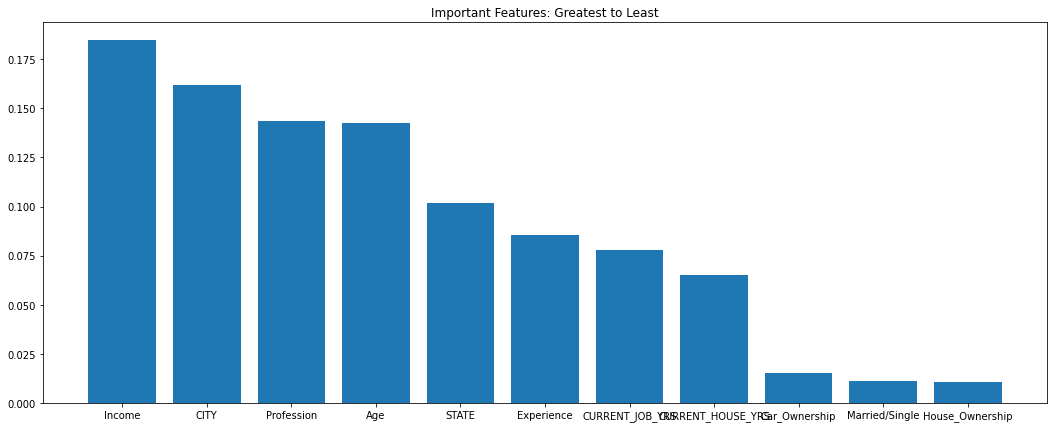

In [20]:
ncols = len(X.columns)
x = np.arange(ncols)

# getting importances of features
importances = rf.feature_importances_

# getting the indices of the most important feature to least important
sort_ind = np.argsort(importances)[::-1]
plt.figure(figsize=(18,7))
plt.bar(x, importances[sort_ind])
plt.xticks(x,tuple(X.columns.values[sort_ind]))
plt.title("Important Features: Greatest to Least")
plt.show()

From the result above, it seems that Income ended by the most important feature by far for classifying who possible defaulters followed by CITY and Profession.

# **Conclusion**

* The dataset has 13 columns (variables) and has 252,000 observations, and the ratio of non-defaulter to defaulter customers is heavily skewed towads non-defaulter customers.
* Random Forest Classifier is the best model in the given situation as it is fairly accurate in predicting both defaulter and non-defaulter customers, and has the highest accuracy
* The most important feature by far for classifying transactions is Income followed by CITY and Profession.